<a href="https://colab.research.google.com/github/Juan-Garcia16/Programacion-3/blob/main/Smart_Farming_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import kagglehub as kh
from kagglehub import KaggleDatasetAdapter as KDA

# Definir el nombre del archivo que queremos cargar
archivo_datos = "Crop_recommendationV2.csv"

# Cargar la última versión disponible del dataset
dataframe = kh.load_dataset(
    KDA.PANDAS,
    "datasetengineer/smart-farming-data-2024-sf24",
    archivo_datos,
)

print("Primeras 5 filas del conjunto de datos:\n", dataframe.head())


<ipython-input-6-891949fbfac1>:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  dataframe = kh.load_dataset(


100%|██████████| 593k/593k [00:00<00:00, 33.7MB/s]

Primeras 5 filas del conjunto de datos:
     N   P   K  temperature   humidity        ph    rainfall label  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice   
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice   
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice   
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice   
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice   

   soil_moisture  soil_type  ...  organic_matter  irrigation_frequency  \
0      29.446064          2  ...        3.121395                     4   
1      12.851183          3  ...        2.142021                     4   
2      29.363913          2  ...        1.474974                     1   
3      26.207732          3  ...        8.393907                     1   
4      28.236236          2  ...        5.202285                     3   

   crop_density  pest_pressure  fertilizer_usage  growth_stage  \
0     11.743910      57.607308   

In [7]:
# Librerías necesarias para procesamiento, modelado y evaluación

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    cohen_kappa_score,
    roc_curve,
    auc
)


In [8]:
# Mostrar las primeras 5 filas del DataFrame sin índices
print(dataframe.iloc[:5].to_string(index=False))


 N  P  K  temperature  humidity       ph   rainfall label  soil_moisture  soil_type  sunlight_exposure  wind_speed  co2_concentration  organic_matter  irrigation_frequency  crop_density  pest_pressure  fertilizer_usage  growth_stage  urban_area_proximity  water_source_type  frost_risk  water_usage_efficiency
90 42 43    20.879744 82.002744 6.502985 202.935536  rice      29.446064          2           8.677355   10.109875         435.611226        3.121395                     4     11.743910      57.607308        188.194958             1              2.719614                  3   95.649985                1.193293
85 58 41    21.770462 80.319644 7.038096 226.655537  rice      12.851183          3           5.754288   12.048050         401.451860        2.142021                     4     16.797101      74.736879         70.963629             1              4.714427                  2   77.265694                1.752672
60 55 44    23.004459 82.320763 7.840207 263.964248  rice      29.3639

In [9]:
# Librerías para carga de datos, preprocesamiento, entrenamiento y evaluación

import kagglehub as kh
from kagglehub import KaggleDatasetAdapter as KDA

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [10]:
# Separación de variables predictoras y variable objetivo
X = dataframe.drop(columns=["label"])
y = dataframe["label"]

# Definición de las columnas categóricas para la codificación
categorical_columns = [
    "soil_type",
    "growth_stage",
    "urban_area_proximity",
    "water_source_type",
    "frost_risk",
    "water_usage_efficiency"
]

# Aplicación de codificación one-hot a variables categóricas
X = pd.get_dummies(X, columns=categorical_columns)

# Normalización de las características
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [11]:
# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === Configuración de modelos y ajuste de hiperparámetros ===

# Support Vector Machine
param_grid_svm = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
model_svm = SVC()
search_svm = GridSearchCV(model_svm, param_grid_svm, cv=3, verbose=1, n_jobs=-1)
search_svm.fit(X_train, y_train)

# Random Forest Classifier
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}
model_rf = RandomForestClassifier()
search_rf = GridSearchCV(model_rf, param_grid_rf, cv=3, verbose=1, n_jobs=-1)
search_rf.fit(X_train, y_train)

# === Evaluación de los resultados ===

print("\n*** Resultados para SVM ***")
y_pred_svm = search_svm.predict(X_test)
print("Hiperparámetros óptimos:", search_svm.best_params_)
print("Precisión obtenida:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

print("\n*** Resultados para Random Forest ***")
y_pred_rf = search_rf.predict(X_test)
print("Hiperparámetros óptimos:", search_rf.best_params_)
print("Precisión obtenida:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Fitting 3 folds for each of 6 candidates, totalling 18 fits

*** Resultados para SVM ***
Hiperparámetros óptimos: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Precisión obtenida: 0.7204545454545455
              precision    recall  f1-score   support

       apple       0.68      0.85      0.76        20
      banana       0.82      0.90      0.86        20
   blackgram       0.67      0.80      0.73        20
    chickpea       1.00      0.85      0.92        20
     coconut       1.00      0.85      0.92        20
      coffee       0.89      0.85      0.87        20
      cotton       0.70      0.70      0.70        20
      grapes       0.80      0.60      0.69        20
        jute       0.64      0.90      0.75        20
 kidneybeans       0.80      1.00      0.89        20
      lentil       0.86      0.60      0.71        20
       maize       0.93      0.70      0.80        20
       mango       0.57      0.60 


=== Resultados SVM ===
Mejores hiperparámetros encontrados: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Precisión alcanzada: 0.7204545454545455
              precision    recall  f1-score   support

       apple       0.68      0.85      0.76        20
      banana       0.82      0.90      0.86        20
   blackgram       0.67      0.80      0.73        20
    chickpea       1.00      0.85      0.92        20
     coconut       1.00      0.85      0.92        20
      coffee       0.89      0.85      0.87        20
      cotton       0.70      0.70      0.70        20
      grapes       0.80      0.60      0.69        20
        jute       0.64      0.90      0.75        20
 kidneybeans       0.80      1.00      0.89        20
      lentil       0.86      0.60      0.71        20
       maize       0.93      0.70      0.80        20
       mango       0.57      0.60      0.59        20
   mothbeans       0.32      0.35      0.33        20
    mungbean       0.65      0.85      

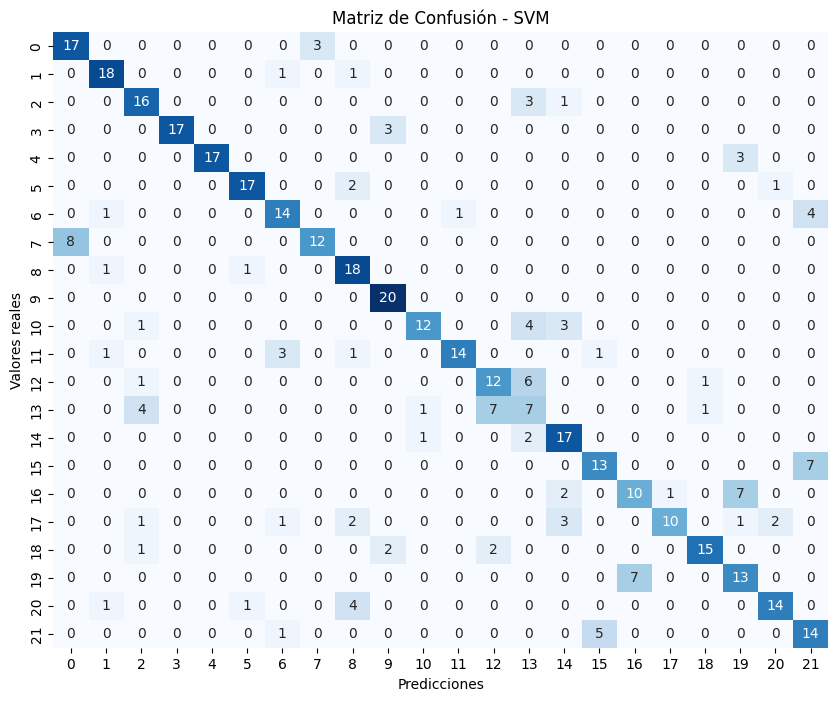

<ipython-input-12-02fee7687a2f>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', n_clases)


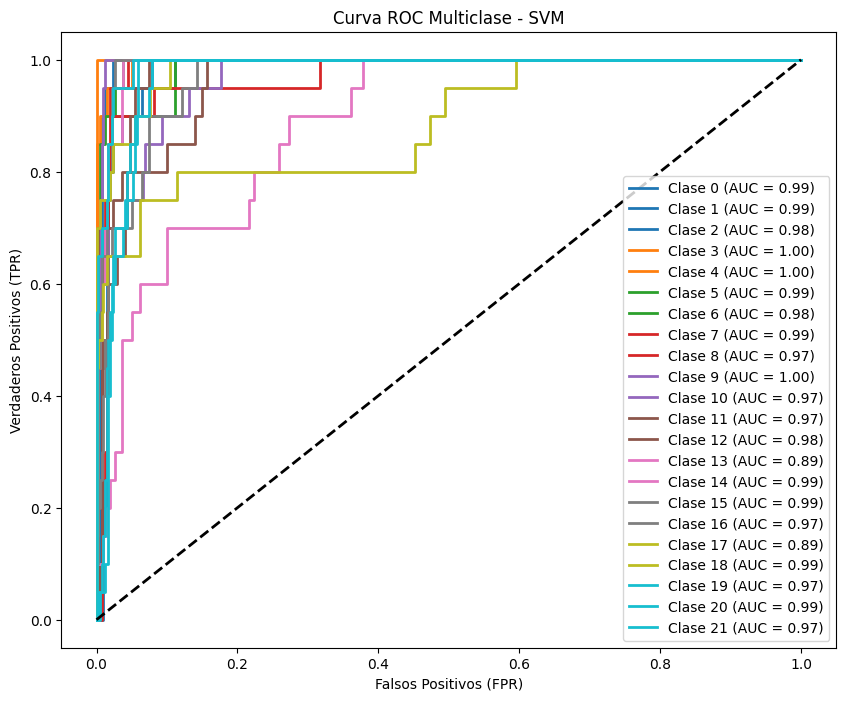


=== Resultados Random Forest ===
Mejores hiperparámetros encontrados: {'max_depth': None, 'n_estimators': 200}
Precisión alcanzada: 0.9568181818181818
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.87      1.00      0.93        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.77      0.85      0.81        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.84      0.80      0.82        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.94      0.80      0.86        20
    mungbean       0.91      1.00    

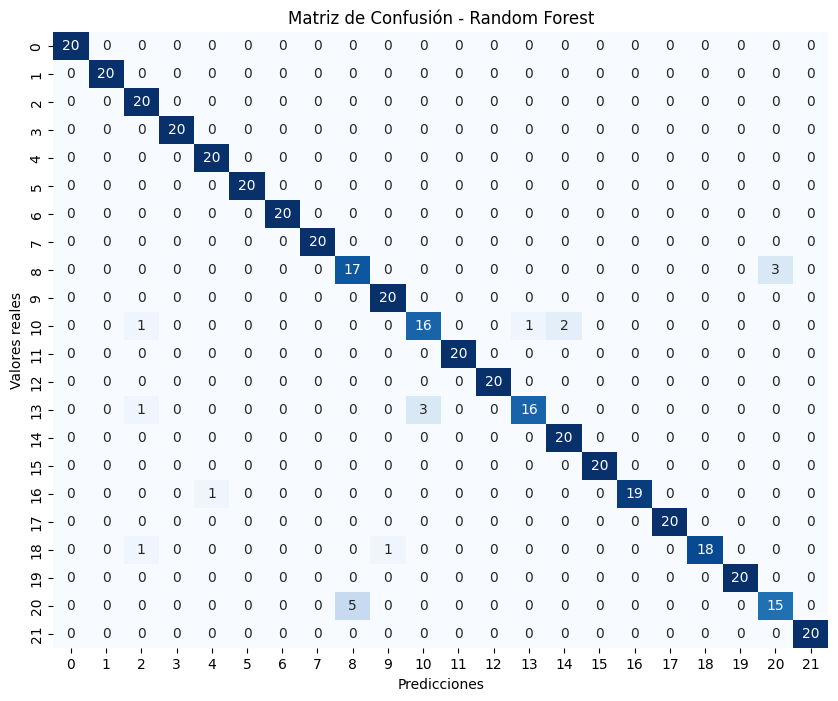

<ipython-input-12-02fee7687a2f>:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colores = plt.cm.get_cmap('tab10', n_clases)


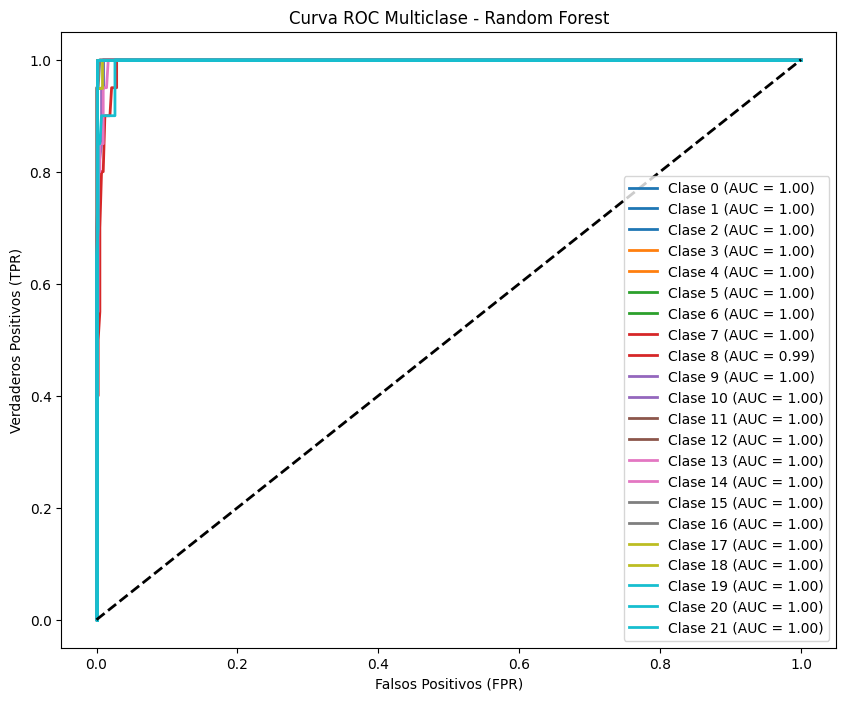

In [12]:
# Librerías para graficar y evaluar desempeño
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# --- Funciones de apoyo para evaluación ---

def graficar_matriz_confusion(y_real, y_predicho, titulo):
    matriz = confusion_matrix(y_real, y_predicho)
    plt.figure(figsize=(10,8))
    sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Matriz de Confusión - {titulo}")
    plt.xlabel("Predicciones")
    plt.ylabel("Valores reales")
    plt.show()

def graficar_roc_multiclase(modelo, X_prueba, y_prueba, titulo):
    if hasattr(modelo, "decision_function"):
        puntuaciones = modelo.decision_function(X_prueba)
    else:
        puntuaciones = modelo.predict_proba(X_prueba)

    y_binario = label_binarize(y_prueba, classes=np.unique(y_prueba))
    n_clases = y_binario.shape[1]

    fpr = dict()
    tpr = dict()
    auc_roc = dict()

    for i in range(n_clases):
        fpr[i], tpr[i], _ = roc_curve(y_binario[:, i], puntuaciones[:, i])
        auc_roc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10,8))
    colores = plt.cm.get_cmap('tab10', n_clases)

    for i in range(n_clases):
        plt.plot(fpr[i], tpr[i], color=colores(i), lw=2,
                 label=f'Clase {i} (AUC = {auc_roc[i]:.2f})')

    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('Falsos Positivos (FPR)')
    plt.ylabel('Verdaderos Positivos (TPR)')
    plt.title(f'Curva ROC Multiclase - {titulo}')
    plt.legend(loc="lower right")
    plt.show()

# --- Resultados para SVM ---
print("\n=== Resultados SVM ===")
y_pred_svm = search_svm.predict(X_test)
print("Mejores hiperparámetros encontrados:", search_svm.best_params_)
print("Precisión alcanzada:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

graficar_matriz_confusion(y_test, y_pred_svm, "SVM")
graficar_roc_multiclase(search_svm.best_estimator_, X_test, y_test, "SVM")

# --- Resultados para Random Forest ---
print("\n=== Resultados Random Forest ===")
y_pred_rf = search_rf.predict(X_test)
print("Mejores hiperparámetros encontrados:", search_rf.best_params_)
print("Precisión alcanzada:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

graficar_matriz_confusion(y_test, y_pred_rf, "Random Forest")
graficar_roc_multiclase(search_rf.best_estimator_, X_test, y_test, "Random Forest")

In [13]:
# Validación cruzada robusta
division_validacion = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Ajuste y búsqueda de hiperparámetros ===

# SVM - configuración
parametros_svm = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto", 0.01, 0.001],
    "degree": [2, 3, 4]
}

modelo_svm = SVC()
busqueda_svm = GridSearchCV(
    estimator=modelo_svm,
    param_grid=parametros_svm,
    scoring="accuracy",
    cv=division_validacion,
    verbose=1,
    n_jobs=-1
)
busqueda_svm.fit(X_train, y_train)

# Random Forest - configuración
parametros_rf = {
    "n_estimators": [100, 200, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

modelo_rf = RandomForestClassifier()
busqueda_rf = GridSearchCV(
    estimator=modelo_rf,
    param_grid=parametros_rf,
    scoring="accuracy",
    cv=division_validacion,
    verbose=1,
    n_jobs=-1
)
busqueda_rf.fit(X_train, y_train)

# === Función de evaluación general ===

def evaluar_modelo(etiqueta, grid, X_prueba, y_real):
    y_estimado = grid.predict(X_prueba)
    print(f"\n>>> Desempeño para {etiqueta} <<<")
    print("Parámetros óptimos:", grid.best_params_)
    print("Exactitud:", accuracy_score(y_real, y_estimado))
    print("Precisión (macro):", precision_score(y_real, y_estimado, average="macro"))
    print("Sensibilidad (macro):", recall_score(y_real, y_estimado, average="macro"))
    print("F1-score (macro):", f1_score(y_real, y_estimado, average="macro"))
    print("\nReporte detallado:")
    print(classification_report(y_real, y_estimado))

evaluar_modelo("SVM", busqueda_svm, X_test, y_test)
evaluar_modelo("Random Forest", busqueda_rf, X_test, y_test)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits

>>> Desempeño para SVM <<<
Parámetros óptimos: {'C': 0.01, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Exactitud: 0.7204545454545455
Precisión (macro): 0.7420664069489006
Sensibilidad (macro): 0.7204545454545453
F1-score (macro): 0.7214084716886976

Reporte detallado:
              precision    recall  f1-score   support

       apple       0.68      0.85      0.76        20
      banana       0.82      0.90      0.86        20
   blackgram       0.67      0.80      0.73        20
    chickpea       1.00      0.85      0.92        20
     coconut       1.00      0.85      0.92        20
      coffee       0.89      0.85      0.87        20
      cotton       0.70      0.70      0.70        20
      grapes       0.80      0.60      0.69        20
        jute       0.64      0.90      0.75        20
 kidneybeans       0.80      1.00      0.89        20
   